# Лабораторна №1
### Лінійна регресія
ФІ-21, Голуб Михайло

### Набір даних
Обрано набір даних *Public transport traffic data in France*

In [24]:
%pip install kagglehub[pandas-datasets]
%pip install pandas
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Download latest version
path = kagglehub.dataset_download("mustafamaher2520/student-performance-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\misha\.cache\kagglehub\datasets\mustafamaher2520\student-performance-data\versions\1


In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
df = pd.read_csv(path+"\SrudentPerformanceScore.csv")
df.head(5)

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\misha\AppData\Local\Temp\ipykernel_31028\928406318.py:4: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv(path+"\SrudentPerformanceScore.csv")


,Student_ID,Performance_Score,Sleep_Hours,Stress_Level,Previous_Exam_Scores,Study_Hours
0,110,28.7,4.4,6.4,87.2,4.3
1,111,33.5,7.5,5.8,72.1,3.9
2,112,40.5,8.7,4.0,62.2,3.8
3,113,44.8,6.6,1.0,80.8,4.7
4,114,36.8,8.5,4.6,53.2,7.2


# Підготовчий етап

### Опис датасету:

This dataset contains detailed records of students with their academic performance rated out of 100. It includes various factors that can influence student outcomes such as average sleep hours per night, self-reported stress levels on a scale from 1 to 10, previous exam scores, and daily study hours. Each student is uniquely identified by a Student ID.

The dataset is designed to facilitate exploratory data analysis, predictive modeling, and multiple regression analysis to understand how sleep patterns, stress, study habits, and past academic performance collectively affect current performance. It also supports thorough assumption testing including linearity, homoscedasticity, normality, independence, and multicollinearity checks.

This data is generated with realistic ranges and distributions to simulate real student behaviors and academic results, making it ideal for educational research and machine learning projects focusing on student success factors.

Columns Description:
Student_ID: Unique identifier for each student
Performance_Score: Academic performance score (0–100)
Sleep_Hours: Average hours slept per night
Stress_Level: Self-reported stress level (1 very low to 10 very high)
Previous_Exam_Scores: Past exam scores (0–100)
Study_Hours: Average daily study time in hours

### Аналіз датасету

In [27]:
print("rows:",len(df))
print("columns:",len(df.columns))
for column in df.columns:
    print(column, type(df[column][0]))
df.count()

rows: 322
columns: 6
Student_ID <class 'numpy.int64'>
Performance_Score <class 'numpy.float64'>
Sleep_Hours <class 'numpy.float64'>
Stress_Level <class 'numpy.float64'>
Previous_Exam_Scores <class 'numpy.float64'>
Study_Hours <class 'numpy.float64'>


Student_ID              322
Performance_Score       322
Sleep_Hours             322
Stress_Level            322
Previous_Exam_Scores    322
Study_Hours             322
dtype: int64

### Визначення вхідних та вихідних параметрів

Student_ID не є параметром

Performance_Score є вихідним параметром

Усі інші параметри -- вхідні

In [28]:
df = df.drop(["Student_ID"], axis = 1)

### Візуалізація кореляцій параметрів

C:\Users\misha\AppData\Local\Temp\ipykernel_31028\2211978679.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",


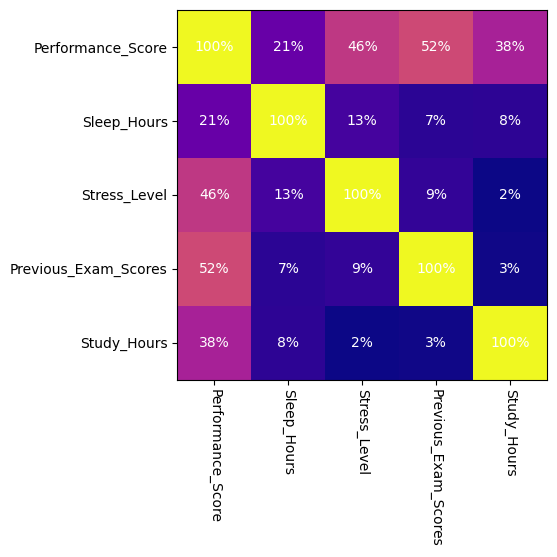

In [29]:


inputs = ["Performance_Score",
        "Sleep_Hours", 
        "Stress_Level", 
        "Previous_Exam_Scores",
        "Study_Hours"]
outputs = ["Performance_Score",
        "Sleep_Hours", 
        "Stress_Level", 
        "Previous_Exam_Scores",
        "Study_Hours"]

fig, ax = plt.subplots()

corr = pd.DataFrame()
for a in inputs:
    for b in outputs:
        corr.loc[a, b] = abs(df.corr().loc[a, b])

ax.imshow(corr, cmap='plasma', interpolation='nearest')
plt.yticks(ticks = range(len(inputs)),labels = inputs)
plt.xticks(ticks = range(len(outputs)),labels = outputs, rotation=-90)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",
                       ha="center", va="center", color="w")

Вхідні параметри між собою мало корельовані, а вихідний параметр слабо корельований з часом сну та не сильно корельований з іншими параметрами

C:\Users\misha\AppData\Local\Temp\ipykernel_31028\803226120.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",


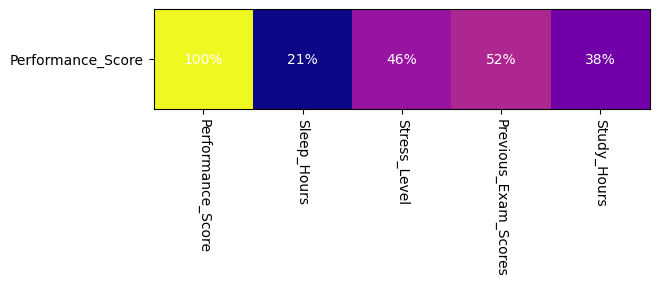

In [30]:
inputs = ["Performance_Score"]
outputs = ["Performance_Score",
        "Sleep_Hours", 
        "Stress_Level", 
        "Previous_Exam_Scores",
        "Study_Hours"]
fig, ax = plt.subplots()
corr = pd.DataFrame()
for a in inputs:
    for b in outputs:
        corr.loc[a, b] = abs(df.corr().loc[a, b])



ax.imshow(corr, cmap='plasma', interpolation='nearest')
plt.yticks(ticks = range(len(inputs)),labels = inputs)
plt.xticks(ticks = range(len(outputs)),labels = outputs, rotation=-90)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",
                       ha="center", va="center", color="w")

Text(0.5, 0, 'Sleep_Hours')

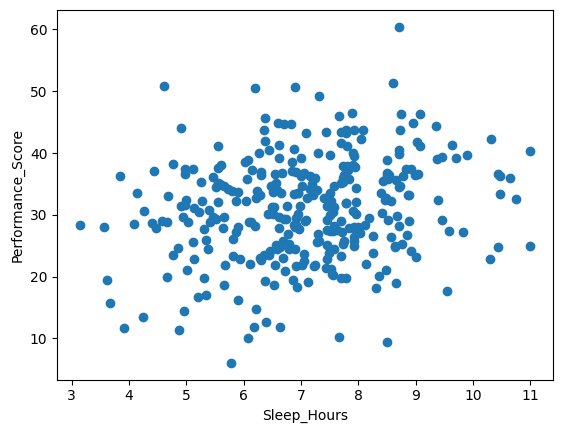

In [31]:
plt.scatter(df["Sleep_Hours"], df["Performance_Score"])
plt.ylabel("Performance_Score")
plt.xlabel("Sleep_Hours")

Text(0.5, 0, 'Stress_Level')

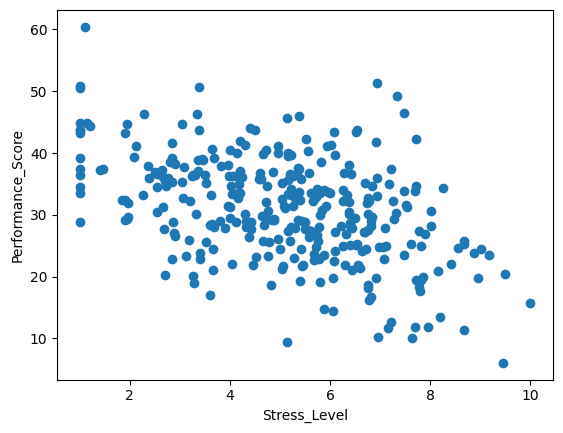

In [32]:
plt.scatter(df["Stress_Level"], df["Performance_Score"])
plt.ylabel("Performance_Score")
plt.xlabel("Stress_Level")

Text(0.5, 0, 'Previous_Exam_Scores')

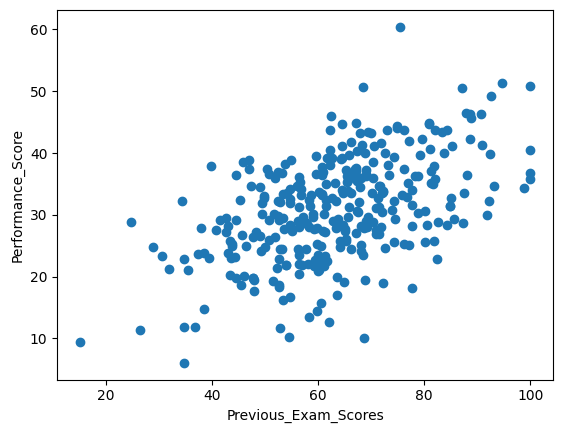

In [33]:
plt.scatter(df["Previous_Exam_Scores"], df["Performance_Score"])
plt.ylabel("Performance_Score")
plt.xlabel("Previous_Exam_Scores")

Text(0.5, 0, 'Study_Hours')

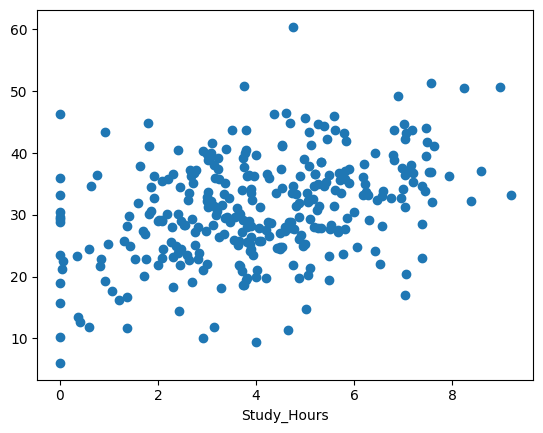

In [34]:
plt.scatter(df["Study_Hours"], df["Performance_Score"])
plt.xlabel("Study_Hours")

Розбиття на навчальний та тестовий датасети:

In [56]:
df_train = df[:int(len(df)*0.7)]
df_test = df[int(len(df)*0.7):]

### Блок 0. Звичайна регресія

[[0.47125405]] 0.5981610804381567


Text(0.5, 0, 'Previous_Exam_Scores')

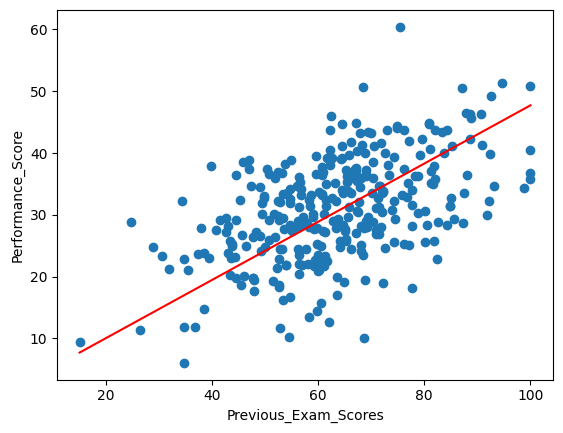

In [57]:
#X_matrix = df.drop("Performance_Score", axis = 1).to_numpy()
X_matrix = df_train["Previous_Exam_Scores"].to_numpy()
Y_matrix = df_train["Performance_Score"].to_numpy()

if X_matrix.ndim == 1:
    X_matrix = X_matrix[:, np.newaxis]
if Y_matrix.ndim == 1:
    Y_matrix = Y_matrix[:, np.newaxis]

X_t = np.transpose(X_matrix)
B_matrix = np.matmul(np.matmul(np.linalg.matrix_power(np.matmul(X_t ,X_matrix), -1), X_t), Y_matrix)

b_0 = np.mean(Y_matrix) - B_matrix * np.mean(X_matrix, axis=0)
b_0 = b_0[0,0]

print(B_matrix, b_0)

regdots_x = [np.min(X_matrix),np.max(X_matrix)]
regdots_y = [(b_0 + B_matrix*np.min(X_matrix))[0,0], (b_0 + B_matrix*np.max(X_matrix))[0,0]]

plt.scatter(df["Previous_Exam_Scores"], df["Performance_Score"])
plt.plot(regdots_x, regdots_y, c = "r")
plt.ylabel("Performance_Score")
plt.xlabel("Previous_Exam_Scores")